Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../../data/bnd_buffer/1/'

NP = 10_000
NC = 10_000
IPP = 1_000
BB = 12_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}6/prod_cons_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}6/prod_cons_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}6/prod_cons_bounded_buffer_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}6/prod_cons_bounded_buffer_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)


Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 16:12:44 2025 +0200) (511.00ms ela...,0.206,0.0000,0.341,0.51,0.05,3.41,68.77 C,Nominal
1,(Sat Apr 12 16:12:44 2025 +0200) (506.77ms ela...,0.307,0.0375,0.379,0.44,0.10,8.03,68.77 C,Nominal
2,(Sat Apr 12 16:12:45 2025 +0200) (506.30ms ela...,0.955,0.0000,0.269,1.06,0.13,10.47,68.50 C,Nominal
3,(Sat Apr 12 16:12:45 2025 +0200) (509.04ms ela...,0.107,0.0000,0.273,0.19,0.05,4.14,68.50 C,Nominal
4,(Sat Apr 12 16:12:46 2025 +0200) (507.27ms ela...,0.207,0.0000,0.280,0.30,0.09,7.19,68.16 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(223, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 16:12:56 2025 +0200) (1008.18ms el...,37.4,0.0000,1.470,38.56,3.90,98.54,68.20 C,Nominal
1,(Sat Apr 12 16:12:57 2025 +0200) (1004.63ms el...,36.4,0.0000,0.660,37.13,3.86,99.23,70.55 C,Nominal
2,(Sat Apr 12 16:12:58 2025 +0200) (1004.71ms el...,34.7,0.0000,1.160,35.67,3.87,98.23,71.93 C,Nominal
3,(Sat Apr 12 16:12:59 2025 +0200) (1004.77ms el...,34.3,0.0000,0.748,35.08,3.73,98.91,73.40 C,Nominal
4,(Sat Apr 12 16:13:00 2025 +0200) (1005.77ms el...,34.9,0.0173,0.726,35.71,3.74,99.74,74.96 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 16:20:47 2025 +0200) (511.69ms ela...,0.1030,0.000,0.266,0.18,0.06,4.71,44.38 C,Nominal
1,(Sat Apr 12 16:20:47 2025 +0200) (509.48ms ela...,0.0804,0.032,0.372,0.18,0.05,3.24,44.38 C,Nominal
2,(Sat Apr 12 16:20:48 2025 +0200) (508.73ms ela...,1.0900,0.000,0.279,1.21,0.19,16.18,44.47 C,Nominal
3,(Sat Apr 12 16:20:48 2025 +0200) (508.29ms ela...,0.0592,0.000,0.268,0.10,0.03,2.24,44.47 C,Nominal
4,(Sat Apr 12 16:20:49 2025 +0200) (508.62ms ela...,0.0986,0.000,0.222,0.15,0.05,3.40,44.51 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(307, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 16:20:59 2025 +0200) (1009.46ms el...,27.9,0.0000,0.787,28.63,3.84,97.84,49.04 C,Nominal
1,(Sat Apr 12 16:21:00 2025 +0200) (1005.13ms el...,27.7,0.0178,0.846,28.46,3.79,97.57,52.22 C,Nominal
2,(Sat Apr 12 16:21:01 2025 +0200) (1005.82ms el...,28.0,0.0000,0.821,28.68,3.84,98.43,55.00 C,Nominal
3,(Sat Apr 12 16:21:02 2025 +0200) (1004.85ms el...,28.9,0.0268,0.803,31.17,3.85,98.00,57.28 C,Nominal
4,(Sat Apr 12 16:21:03 2025 +0200) (1004.72ms el...,27.7,0.0000,0.612,30.25,3.82,97.80,59.05 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

print(scala_idle_data.dtypes)
print(scala_bench_data.dtypes)
print(erlang_idle_data.dtypes)
print(erlang_bench_data.dtypes)

Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA) Power(W)           float64
Avg Num Cores Active            float64
Cores Active(%)                 float64
CPU Temp(C)                     float64
Pressure Level                   object
Time Elapsed (ms)               float64
dtype: object
Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA) Power(W)           float64
Avg Num Cores Active            float64
Cores Active(%)                 float64
CPU Temp(C)                     float64
Pressure Level                   object
Time Elapsed (ms)               float64
dtype: object
Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 16:12:44,0.206,0.0000,0.341,0.51,0.05,3.41,68.77,Nominal,511.00
1,2025-04-12 16:12:44,0.307,0.0375,0.379,0.44,0.10,8.03,68.77,Nominal,506.77
2,2025-04-12 16:12:45,0.955,0.0000,0.269,1.06,0.13,10.47,68.50,Nominal,506.30
3,2025-04-12 16:12:45,0.107,0.0000,0.273,0.19,0.05,4.14,68.50,Nominal,509.04
4,2025-04-12 16:12:46,0.207,0.0000,0.280,0.30,0.09,7.19,68.16,Nominal,507.27


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(223, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 16:12:56,37.4,0.0000,1.470,38.56,3.90,98.54,68.20,Nominal,1008.18
1,2025-04-12 16:12:57,36.4,0.0000,0.660,37.13,3.86,99.23,70.55,Nominal,1004.63
2,2025-04-12 16:12:58,34.7,0.0000,1.160,35.67,3.87,98.23,71.93,Nominal,1004.71
3,2025-04-12 16:12:59,34.3,0.0000,0.748,35.08,3.73,98.91,73.40,Nominal,1004.77
4,2025-04-12 16:13:00,34.9,0.0173,0.726,35.71,3.74,99.74,74.96,Nominal,1005.77


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 16:20:47,0.1030,0.000,0.266,0.18,0.06,4.71,44.38,Nominal,511.69
1,2025-04-12 16:20:47,0.0804,0.032,0.372,0.18,0.05,3.24,44.38,Nominal,509.48
2,2025-04-12 16:20:48,1.0900,0.000,0.279,1.21,0.19,16.18,44.47,Nominal,508.73
3,2025-04-12 16:20:48,0.0592,0.000,0.268,0.10,0.03,2.24,44.47,Nominal,508.29
4,2025-04-12 16:20:49,0.0986,0.000,0.222,0.15,0.05,3.40,44.51,Nominal,508.62


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(307, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 16:20:59,27.9,0.0000,0.787,28.63,3.84,97.84,49.04,Nominal,1009.46
1,2025-04-12 16:21:00,27.7,0.0178,0.846,28.46,3.79,97.57,52.22,Nominal,1005.13
2,2025-04-12 16:21:01,28.0,0.0000,0.821,28.68,3.84,98.43,55.00,Nominal,1005.82
3,2025-04-12 16:21:02,28.9,0.0268,0.803,31.17,3.85,98.00,57.28,Nominal,1004.85
4,2025-04-12 16:21:03,27.7,0.0000,0.612,30.25,3.82,97.80,59.05,Nominal,1004.72


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


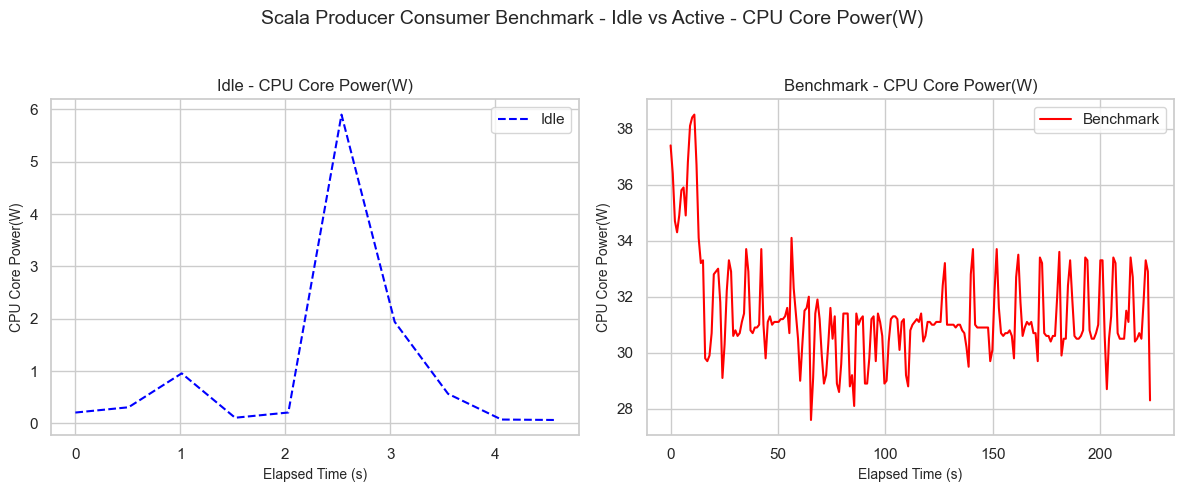

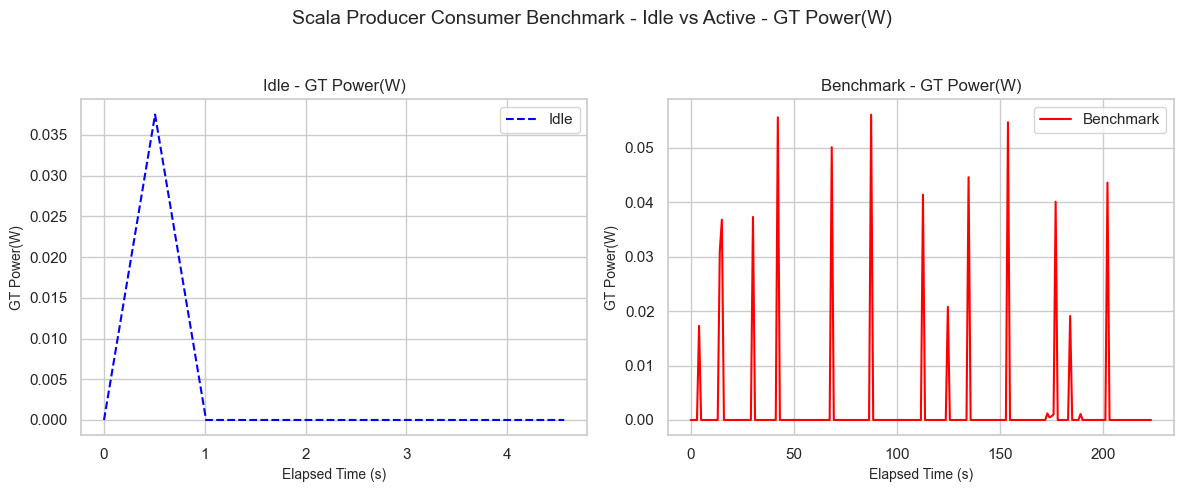

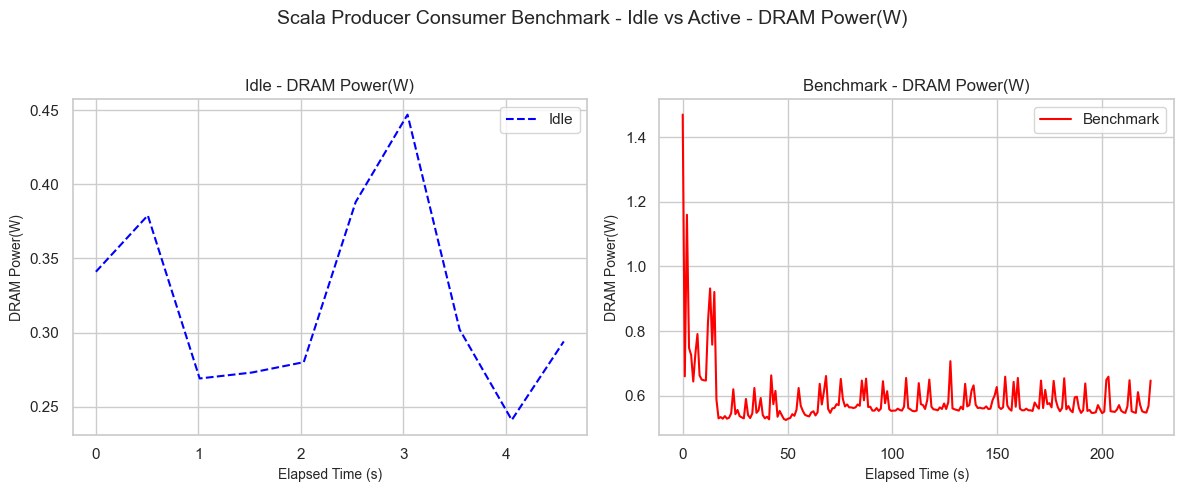

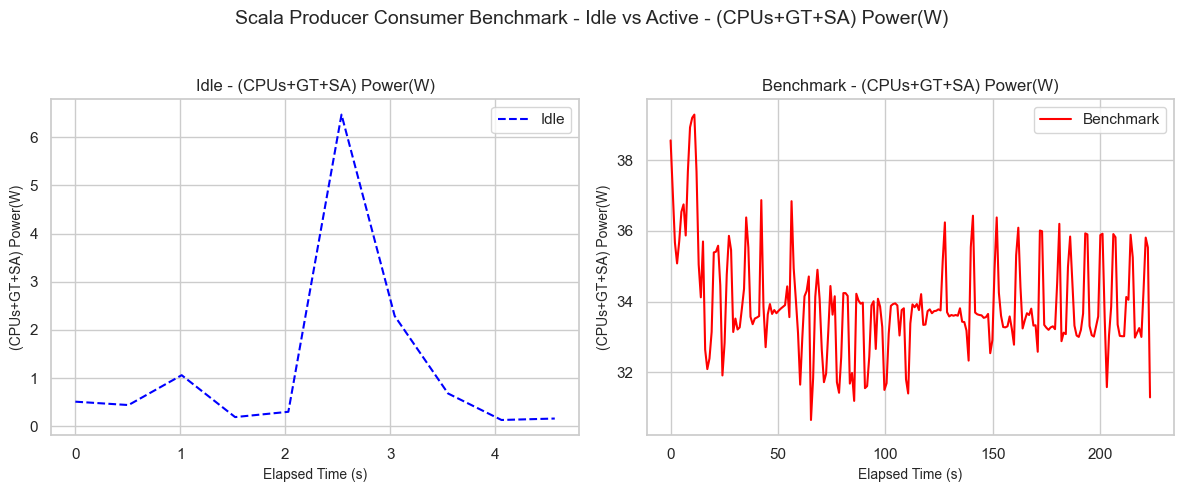

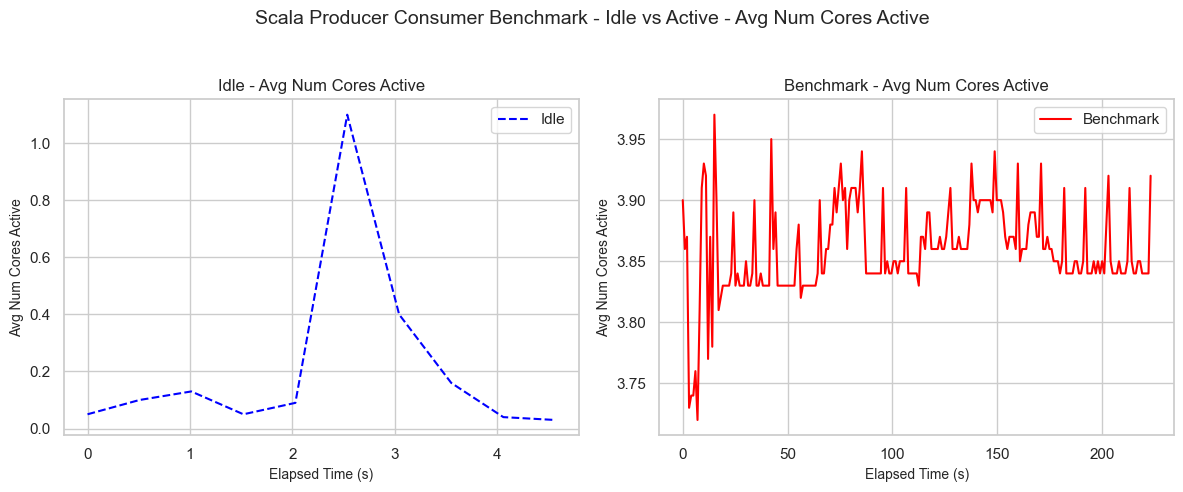

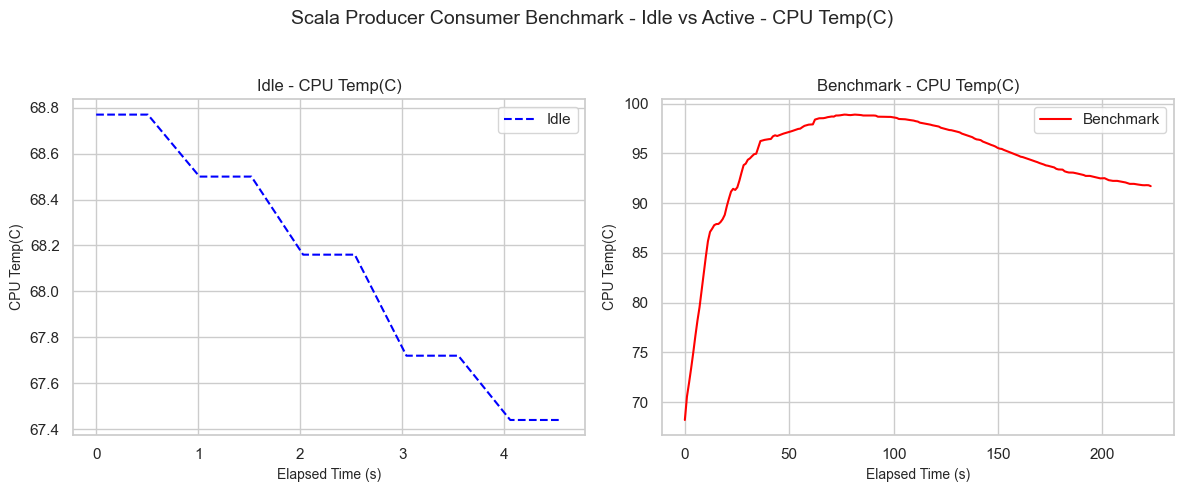

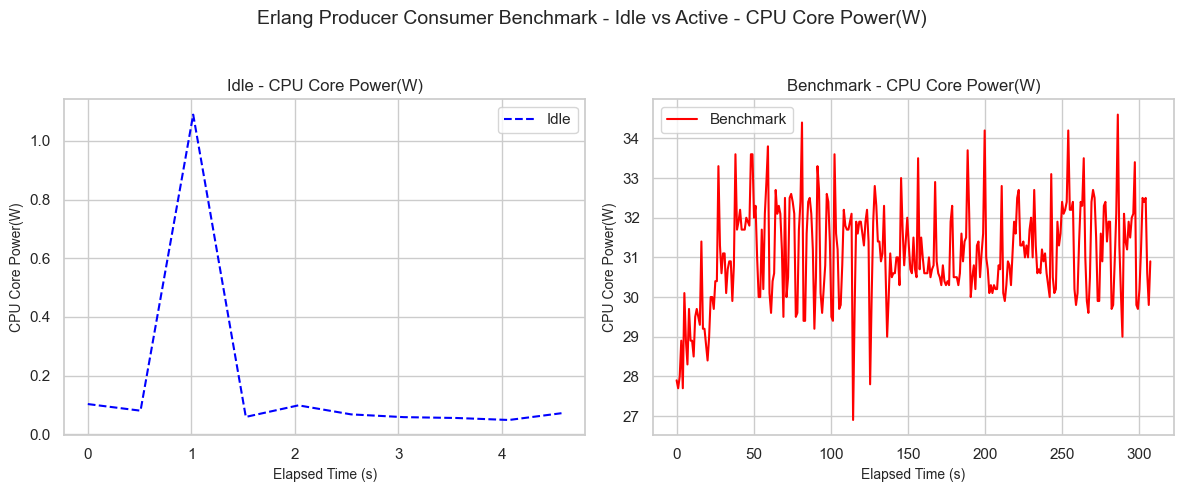

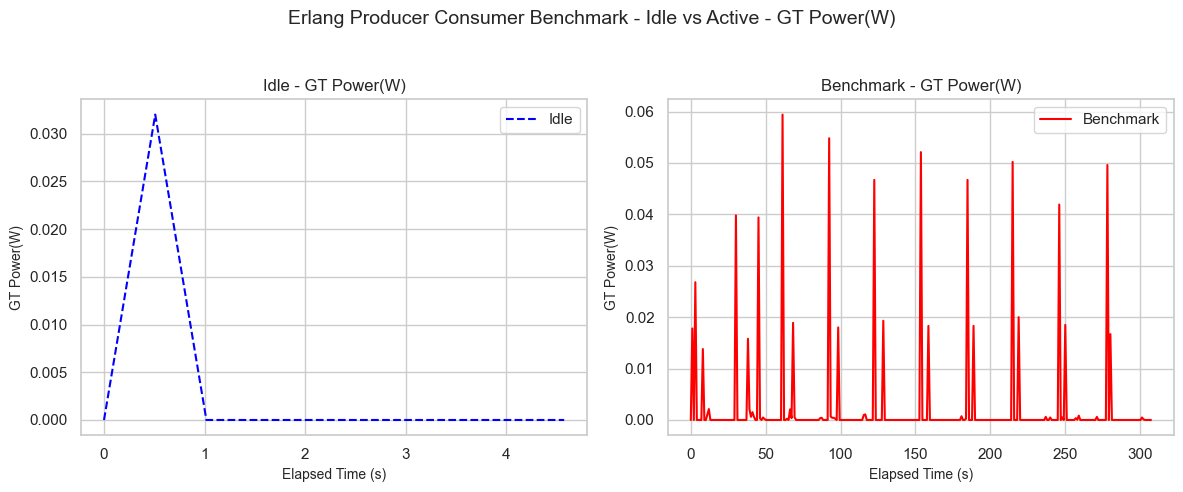

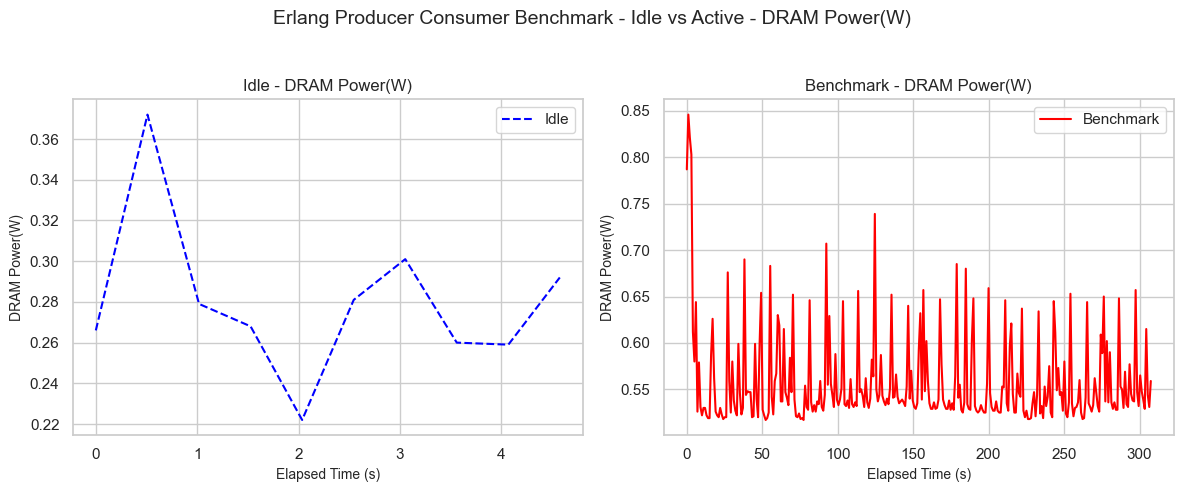

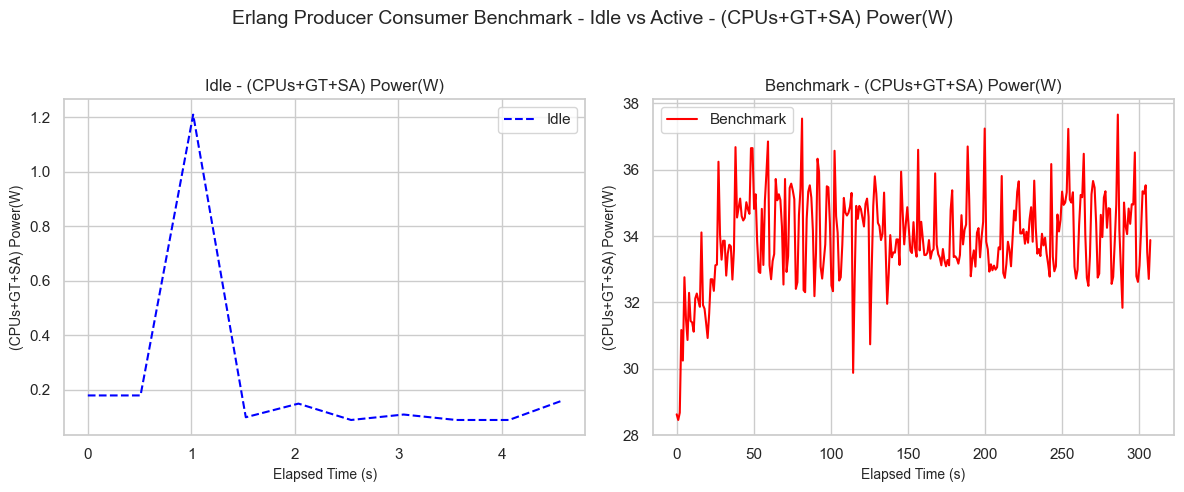

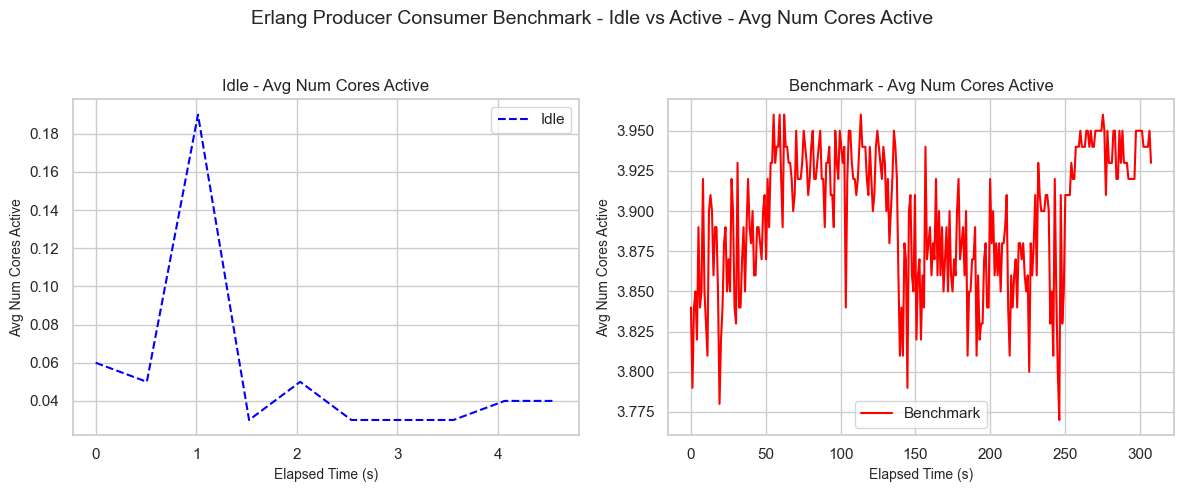

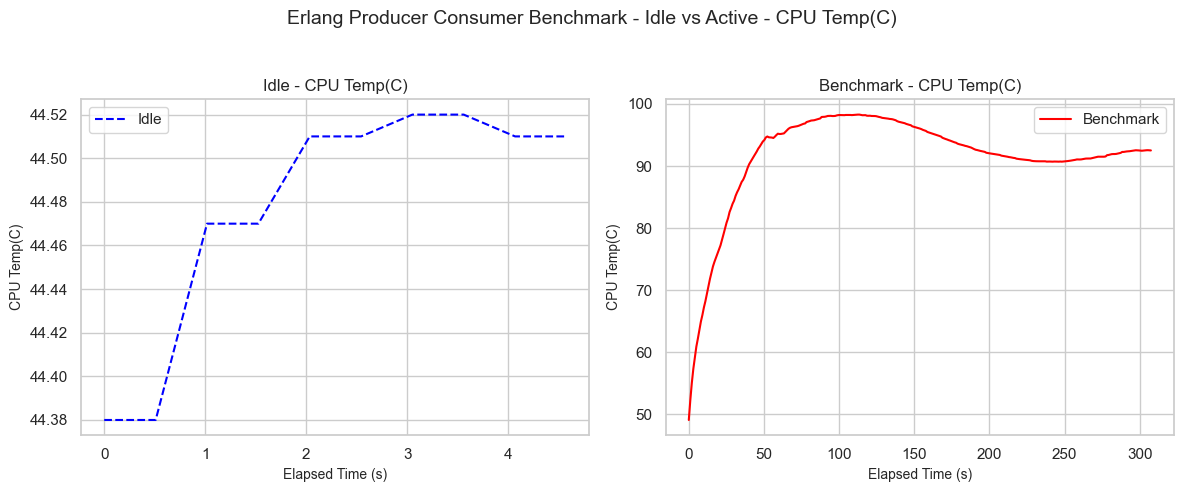

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Producer Consumer Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Producer Consumer Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()

In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

producers = format_number_str(NP)
consumers = format_number_str(NC)
item_per_producer = format_number_str(IPP)
buffer_size = format_number_str(BB)
title_config_prefix = f"({producers} Producers, {consumers} Consumers,{item_per_producer} Items, {buffer_size} Buffer Size, {ITERATIONS} Iterations)"

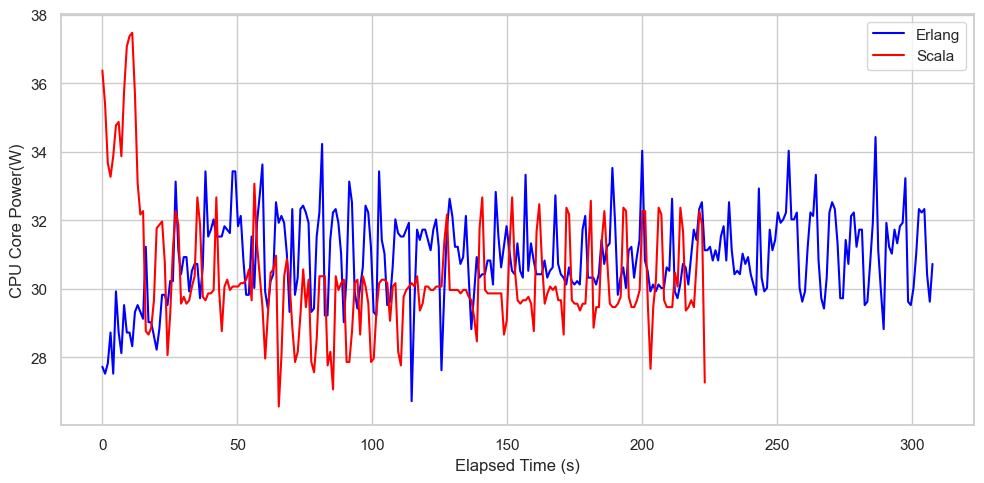

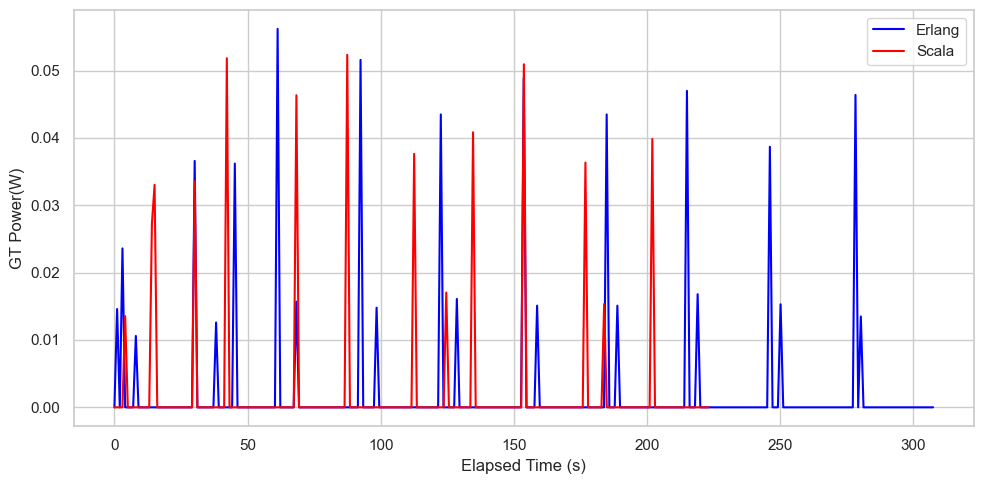

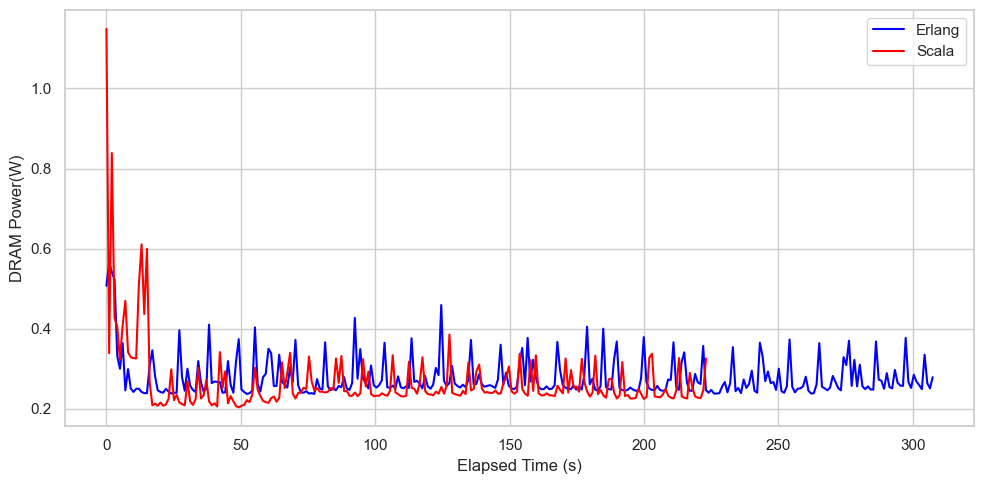

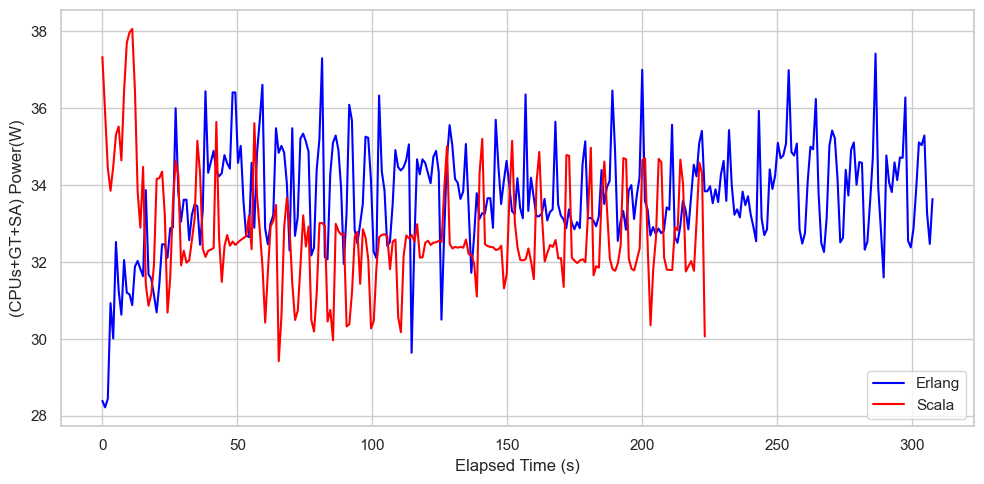

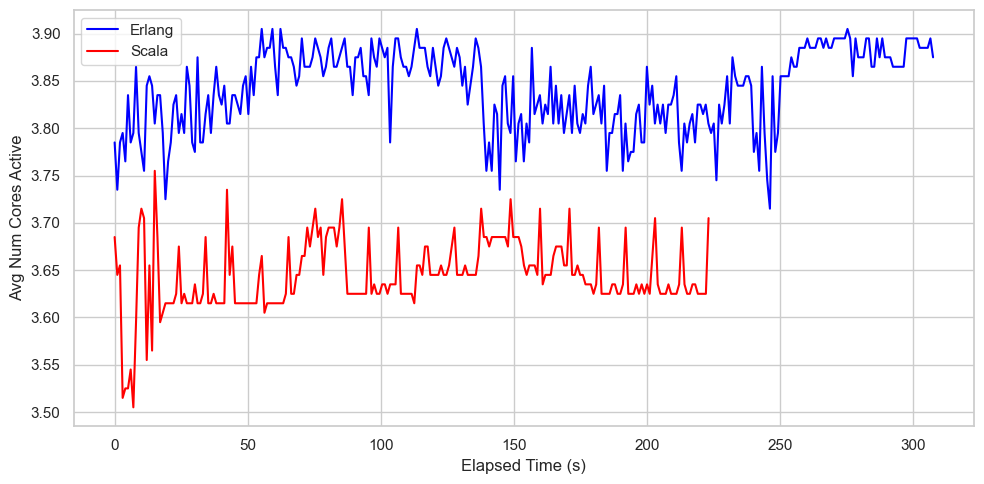

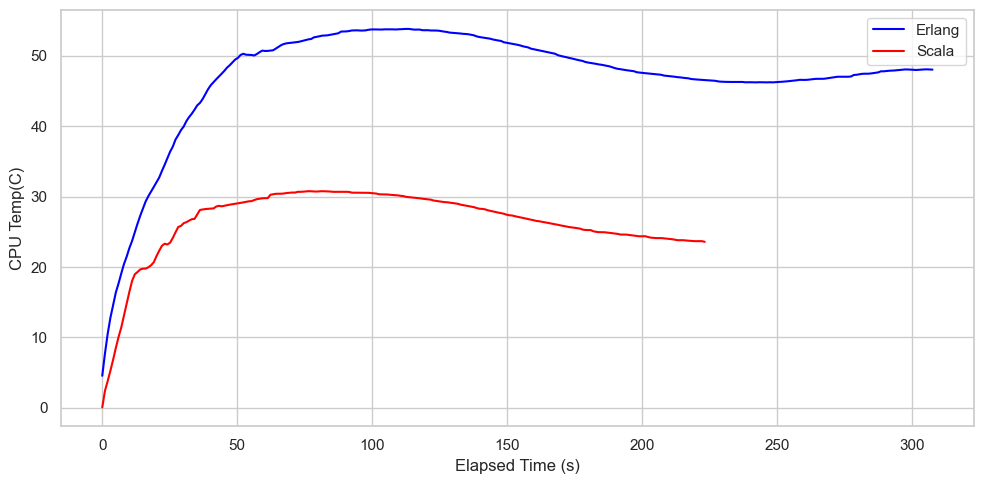

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Producer-Consumer Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.345757
GT Power(W)              -0.001270
DRAM Power(W)             0.267044
(CPUs+GT+SA) Power(W)    32.725027
CPU Temp(C)              26.352493
Avg Num Cores Active      3.644013
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        30.893435
GT Power(W)              -0.000840
DRAM Power(W)             0.277495
(CPUs+GT+SA) Power(W)    33.701524
CPU Temp(C)              47.070339
Avg Num Cores Active      3.842003
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "NP": NP,
    "NC": NC,
    "IPP": IPP,
    "BB": BB,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["NC"] == NC) & 
        (existing_data["NP"] == NP) &
        (existing_data["IPP"] == IPP) &
        (existing_data["BB"] == BB) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for NC =", NC, "NP =", NP, "IPP =", IPP, "BB =", BB, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/bnd_buffer/1/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 6860.38040657066 Joules
Erlang Benchmark: 9614.211827540936 Joules
